In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Load Dataset Apples and Oranges

In [25]:
df = pd.read_csv("../DATA/apples_and_oranges.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (40, 3)

First 5 rows:


,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


# Data Understanding

In [26]:
print("Dataset Info:")
print(df.info())
print("\n" + "=" * 50)
print("Statistical Summary:")
print(df.describe())
print("\n" + "=" * 50)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "=" * 50)
print("Duplicate Rows:", df.duplicated().sum())
print("\n" + "=" * 50)
print("Class Distribution:")
print(df['Class'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB
None

Statistical Summary:
          Weight       Size
count  40.000000  40.000000
mean   70.200000   4.922750
std     3.039906   0.590063
min    65.000000   4.010000
25%    68.000000   4.360000
50%    70.000000   4.930000
75%    73.000000   5.472500
max    75.000000   5.850000

Missing Values:
Weight    0
Size      0
Class     0
dtype: int64

Duplicate Rows: 0

Class Distribution:
Class
orange    20
apple     20
Name: count, dtype: int64


# Data Preprocessing

In [27]:

# Remove duplicates
df = df.drop_duplicates()

# Remove null values
df = df.dropna()

print(f"Dataset shape after cleaning: {df.shape}")


Dataset shape after cleaning: (40, 3)


# Exploratory Data Analysis (EDA)

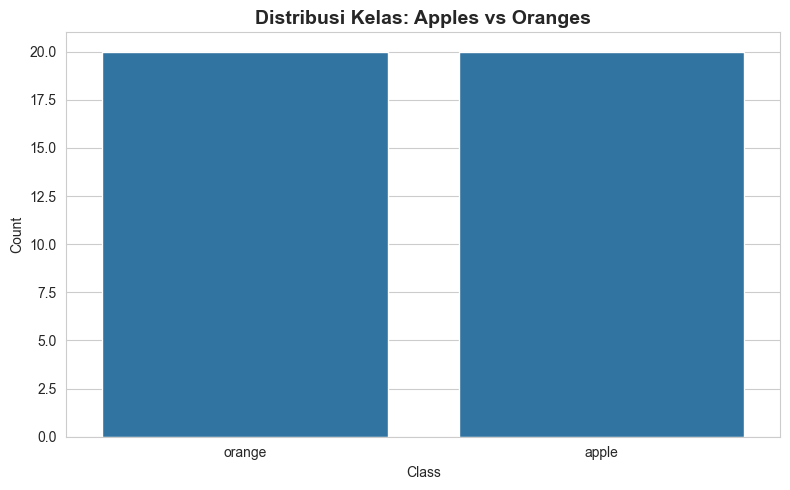

In [28]:
# Distribution of Classes
import os

OUTPUT_DIR = "../REPORTS/OUTPUT"
os.makedirs(OUTPUT_DIR, exist_ok=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class')
plt.title('Distribusi Kelas: Apples vs Oranges', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/01_class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


# Feature Distributions by Class

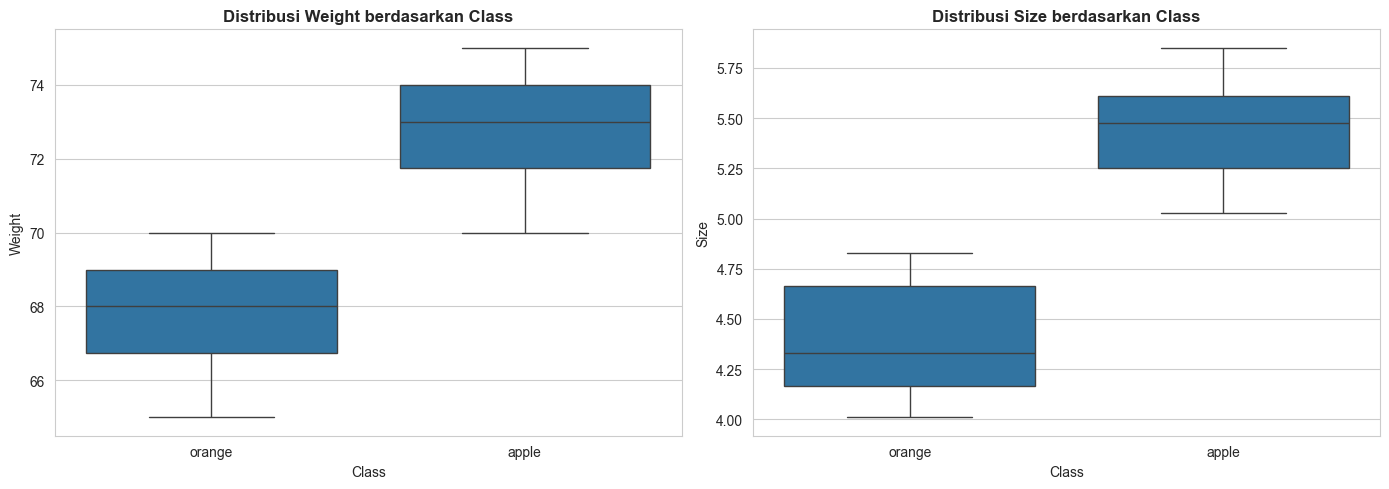

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weight distribution
sns.boxplot(data=df, x='Class', y='Weight', ax=axes[0])
axes[0].set_title('Distribusi Weight berdasarkan Class', fontweight='bold')
axes[0].set_ylabel('Weight')

# Size distribution
sns.boxplot(data=df, x='Class', y='Size', ax=axes[1])
axes[1].set_title('Distribusi Size berdasarkan Class', fontweight='bold')
axes[1].set_ylabel('Size')

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/02_feature_distributions.png", dpi=300, bbox_inches='tight')
plt.show()


# Scatter Plot - Weight vs Size

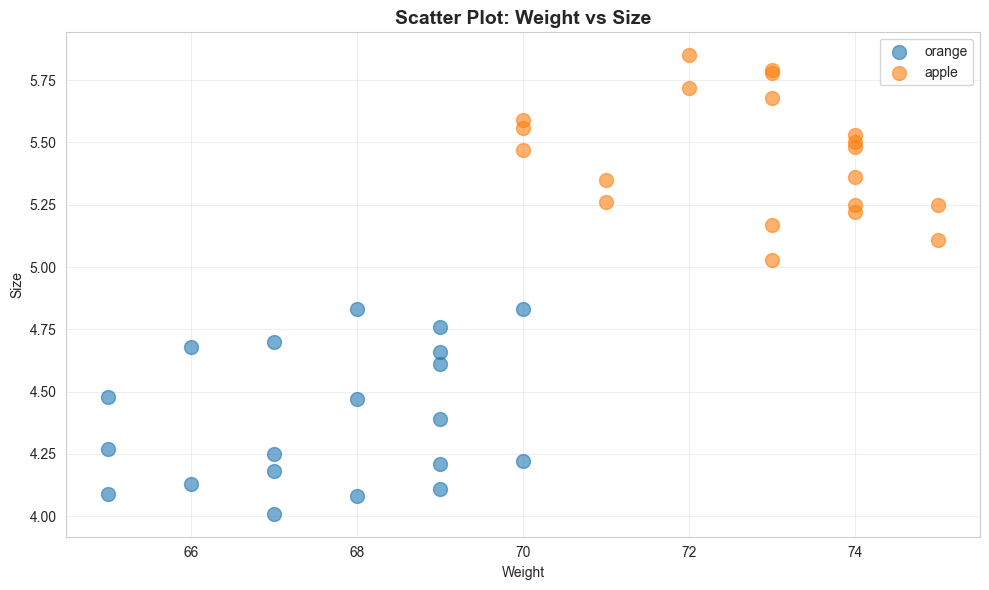

In [30]:
plt.figure(figsize=(10, 6))
for fruit_class in df['Class'].unique():
    subset = df[df['Class'] == fruit_class]
    plt.scatter(subset['Weight'], subset['Size'], label=fruit_class, s=100, alpha=0.6)
plt.title('Scatter Plot: Weight vs Size', fontsize=14, fontweight='bold')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/03_scatter_plot.png", dpi=300, bbox_inches='tight')
plt.show()


# Correlation Matrix

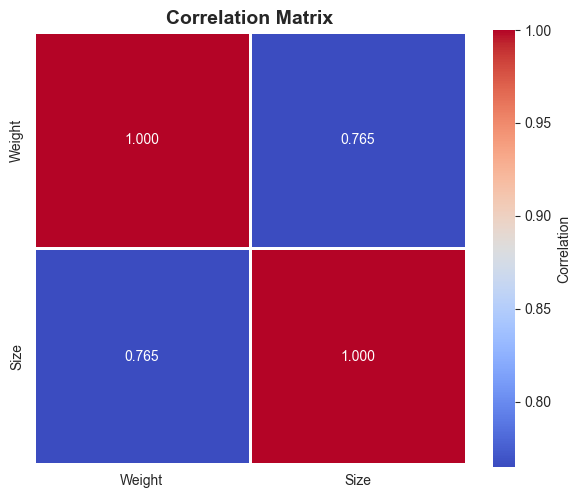

In [31]:
feature_cols = ['Weight', 'Size']
plt.figure(figsize=(6, 5))
correlation = df[feature_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.3f', square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/04_correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


# Prepare Features and Target

In [32]:
feature_cols = ['Weight', 'Size']
X = df[feature_cols]
y = df['Class']

print("Features (X):", X.shape)
print("Target (y):", y.shape)
print("\nTarget classes:", y.unique())
print("\nClass distribution:")
print(y.value_counts())


Features (X): (40, 2)
Target (y): (40,)

Target classes: ['orange' 'apple']

Class distribution:
Class
orange    20
apple     20
Name: count, dtype: int64


# Split Data (80% Training, 20% Testing)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {len(X_train)} samples ({len(X_train) / len(df) * 100:.1f}%)")
print(f"Testing set: {len(X_test)} samples ({len(X_test) / len(df) * 100:.1f}%)")
print(f"\nTraining set distribution:\n{y_train.value_counts()}")
print(f"\nTesting set distribution:\n{y_test.value_counts()}")


Training set: 32 samples (80.0%)
Testing set: 8 samples (20.0%)

Training set distribution:
Class
apple     16
orange    16
Name: count, dtype: int64

Testing set distribution:
Class
apple     4
orange    4
Name: count, dtype: int64


# Create SVM

In [34]:
model = SVC(kernel='linear')
dt = model.fit(X_train, y_train)

In [35]:
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("=" * 60)
print("TRAINING SET EVALUATION")
print("=" * 60)
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))


TRAINING SET EVALUATION
Accuracy: 100.00%

Confusion Matrix:
[[16  0]
 [ 0 16]]

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



# Model Evaluation - Testing Set

In [36]:
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=" * 60)
print("TESTING SET EVALUATION")
print("=" * 60)
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


TESTING SET EVALUATION
Accuracy: 100.00%

Confusion Matrix:
[[4 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# Confusion Matrix Visualization

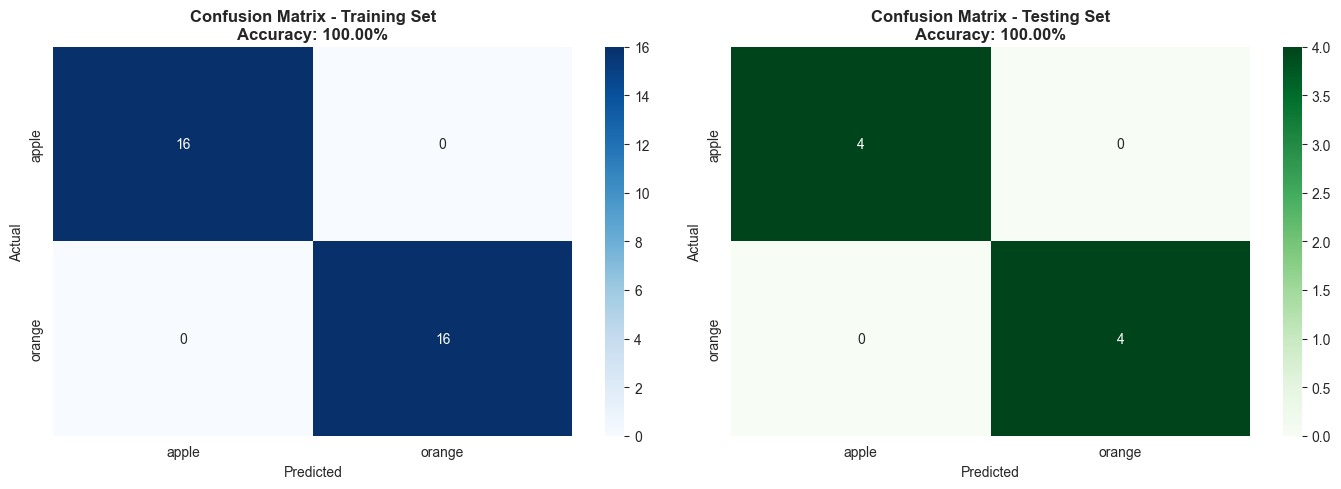

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt.classes_,
            yticklabels=dt.classes_, ax=axes[0])
axes[0].set_title(f'Confusion Matrix - Training Set\nAccuracy: {train_accuracy * 100:.2f}%',
                  fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Testing Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=dt.classes_,
            yticklabels=dt.classes_, ax=axes[1])
axes[1].set_title(f'Confusion Matrix - Testing Set\nAccuracy: {test_accuracy * 100:.2f}%',
                  fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/05_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


# Visualize SVM Decision Boundary

C:\Users\Arch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


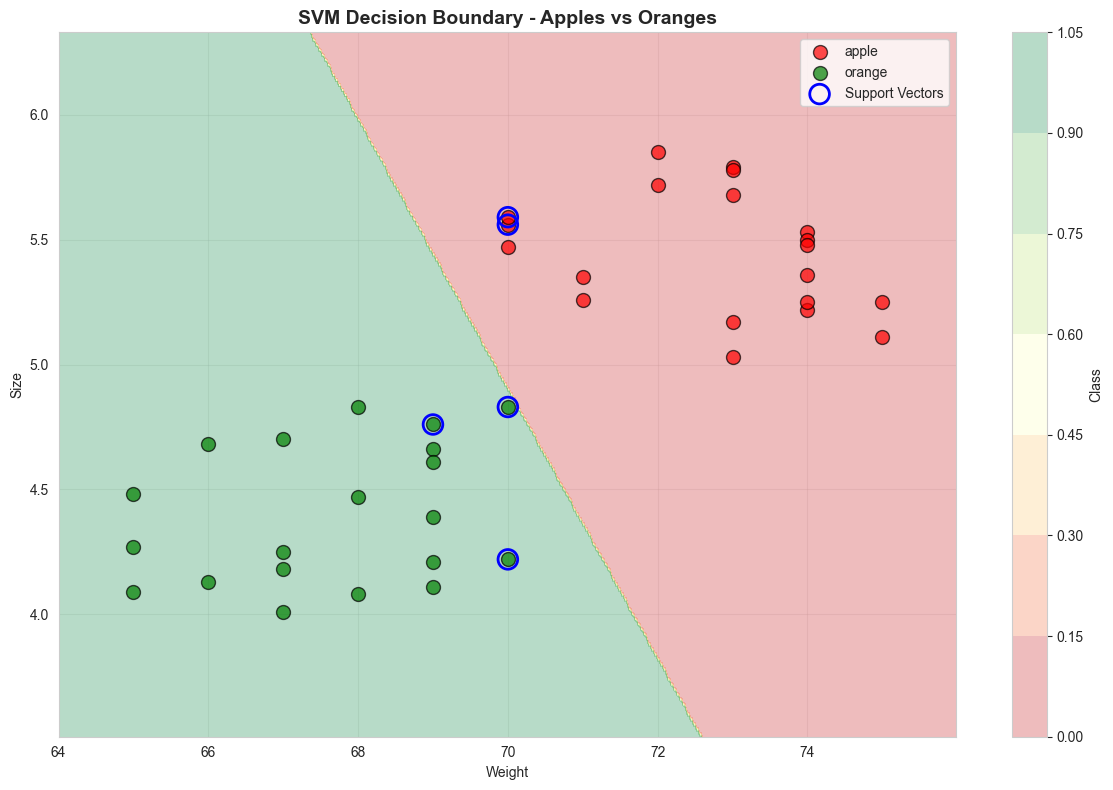

In [38]:
import numpy as np

# Create mesh for decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X['Weight'].min() - 1, X['Weight'].max() + 1
y_min, y_max = X['Size'].min() - 0.5, X['Size'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Encode labels for plotting
le = LabelEncoder()
y_encoded = le.fit_transform(y)
Z_encoded = le.transform(Z)
Z_encoded = Z_encoded.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z_encoded, alpha=0.3, cmap='RdYlGn')
plt.colorbar(label='Class')

# Plot training points
colors = ['red', 'green']
for i, fruit_class in enumerate(le.classes_):
    idx = y == fruit_class
    plt.scatter(X.loc[idx, 'Weight'], X.loc[idx, 'Size'],
                c=colors[i], label=fruit_class, s=100, edgecolor='black', alpha=0.7)

# Plot support vectors
plt.scatter(X_train.iloc[model.support_, 0], X_train.iloc[model.support_, 1],
            s=200, linewidth=2, facecolors='none', edgecolors='blue', label='Support Vectors')

plt.title('SVM Decision Boundary - Apples vs Oranges', fontsize=14, fontweight='bold')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/06_svm_decision_boundary.png", dpi=300, bbox_inches='tight')
plt.show()


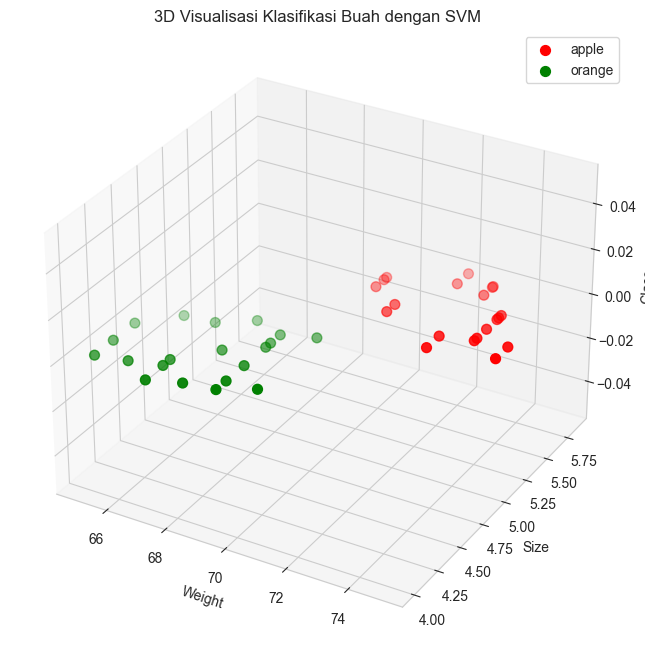

In [39]:

le = LabelEncoder()
    df['ClassEncoded'] = le.fit_transform(df['Class'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = le.classes_

for i, classes in enumerate(labels):
    subset = df[df['ClassEncoded'] == i]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        color=colors[i],
        label=classes,
        s=50
    )

ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Class')
ax.set_title('3D Visualisasi Klasifikasi Buah dengan SVM')
ax.legend()
plt.show()

# Summary Results

In [41]:
summary = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Training': [f"{train_accuracy * 100:.2f}%"],
    'Testing': [f"{test_accuracy * 100:.2f}%"]
})

print("\n" + "=" * 70)
print("MODEL SUMMARY")
print("=" * 70)
print(summary.to_string(index=False))
print("=" * 70)



MODEL SUMMARY
  Metric Training Testing
Accuracy  100.00% 100.00%
